<div>
    <img src=https://www.stemjobs.com/wp-content/uploads/2016/04/ThinkstockPhotos-475432710.jpg width="300" style="float:right;margin: 5px 5px">
</div>

# NASA Top 50 Solar Flares
#### By: Seth Gregory

This project serves to obtain and analyze data regarding the top 50 solar flares recorded by NASA since 1998. It is broken up into several part: first, data about solar flares is scraped from both the NASA site, and another site with information on the top 50 flares, SpaceWeatherLive.com, the latter of which is used to compare with the NASA data. After this, the data is organized, and the top 50 flares from the NASA site are matched with their likely counterparts. In this way the top 50 flares from the NASA site are designated. Finally, the data is used to consider the claim that the biggest solar flares tend to occur in tandem with a cluster of flares.

## Scraping the SpaceWeatherLive (SWL) Data:
First, we will obtain the data from SpaceWeatherLive.com using BeautifulSoup to scrape the HTML data.

In [171]:
import requests
r = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html')

In [172]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

# Output suppressed, but used to inform the following section
# soup.prettify()

In [173]:
baseData = soup.find('table', { 'class' : 'table table-striped table-responsive-md'}).find("tbody")

In [174]:
rows = baseData.findChildren('tr')
table = []

for row in rows:
    cells = row.findChildren('td')
    text = []
    
    for cell in cells:
        text.append(cell.text)
        
    table.append(text)

Here, we use pandas to place the data into a table.

In [175]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)
frame = pd.DataFrame(table, columns=['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie'], index=range(1,51))
frame

,rank,x_class,date,region,start_time,max_time,end_time,movie
1,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
...,...,...,...,...,...,...,...,...
46,46,X2.7,2015/05/05,2339,22:05,22:11,22:15,MovieView archive
47,47,X2.7,2003/11/03,0488,01:09,01:30,01:45,MovieView archive
48,48,X2.7,1998/05/06,8210,07:58,08:09,08:20,MovieView archive
49,49,X2.6,2005/01/15,0720,22:25,23:02,23:31,MovieView archive


## Tidying the SWL Data:
Now that we've got the SpaceWeatherLive Data into a table, we can change things around a bit to make it clearer to look at. First, we drop the last column, since it's redundant, then we combine the date and time columns to make start, end, and max datetime columns. The result is a final table of the SWL data that we will reference later.

In [95]:
import datetime as dt

updated_frame = frame.drop(columns='movie')

for index, row in updated_frame.iterrows():
    date = row['date'].split('/')
    start_time = row['start_time'].split(':')
    max_time = row['max_time'].split(':')
    end_time = row['end_time'].split(':')
    
    start_dt = dt.datetime(int(date[0]), int(date[1]), int(date[2]), int(start_time[0]),int(start_time[1]))
    max_dt = dt.datetime(int(date[0]), int(date[1]), int(date[2]), int(max_time[0]),int(max_time[1]))
    end_dt = dt.datetime(int(date[0]), int(date[1]), int(date[2]), int(end_time[0]),int(end_time[1]))
    
    updated_frame.at[index, 'start_time'] = start_dt
    updated_frame.at[index, 'max_time'] = max_dt
    updated_frame.at[index, 'end_time'] = end_dt
    
updated_frame = updated_frame.drop(columns='date')
updated_frame = updated_frame.reindex(columns=['rank', 'x_class', 'start_time', 'max_time', 'end_time', 'region'])
updated_frame = updated_frame.rename(columns={'start_time': 'start_datetime', 'max_time': 'max_datetime', 'end_time': 'end_datetime'})

updated_frame

,rank,x_class,start_datetime,max_datetime,end_datetime,region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
...,...,...,...,...,...,...
46,46,X2.7,2015-05-05 22:05:00,2015-05-05 22:11:00,2015-05-05 22:15:00,2339
47,47,X2.7,2003-11-03 01:09:00,2003-11-03 01:30:00,2003-11-03 01:45:00,0488
48,48,X2.7,1998-05-06 07:58:00,1998-05-06 08:09:00,1998-05-06 08:20:00,8210
49,49,X2.6,2005-01-15 22:25:00,2005-01-15 23:02:00,2005-01-15 23:31:00,0720


## Scraping the NASA Data:
Now, using BeautifulSoup once again, we'll scrape the data from the NASA site and place it into a table. There's more data for each flare this time, so the table will be several columns larger.

In [176]:
import requests
from bs4 import BeautifulSoup

nasa = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
nasa_soup = BeautifulSoup(nasa.text, 'html.parser')

# Suppressed
# nasa_soup.prettify()

In [180]:
import pandas as pd
import numpy as np

lines = nasa_soup.find('pre').get_text().splitlines()[12:]
split_lines = []
for line in lines:
    line_string = str(line)
    split = line_string.split()[:14]
    split_lines.append(split)

nasa_frame = pd.DataFrame(split_lines, columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'])
nasa_frame = nasa_frame.drop(index=518)
nasa_frame

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


## Tidying the NASA Data:
Like before, now we will organize the NASA data a bit better, combining and adding some columns. First, we recode any missing entries as NaN. Next, we create three datetime columns, as before. Then, we handle the case of "Halo" flares in the cme_angle column by creating a new column with "true" or "false" corresponding to whether or not the flare is a Halo flare or not. Finally, we remove the lower bound indicators from the cme_width column, replacing it with a new column that signifies whether the given flare's width is given as a lower bound.

In [178]:
import datetime as dt

# Signify missing data
updated_nasa_frame = nasa_frame.replace(['????', '-----', '----', '---', '--:--', '--/--'], np.nan)

# Function for creating is_halo column
def is_halo(n):
    return n == 'Halo'

# Add is_halo column and replace 'Halo' values with NaN
cme_angles = updated_nasa_frame['cme_angle']
updated_nasa_frame['is_halo'] = list(map(is_halo, cme_angles))
updated_nasa_frame = updated_nasa_frame.replace('Halo', np.nan)

# Function for creating width_lower_bound column
def is_lower_bound(n):
    return '>' in str(n)

# Add width_lower_bound column and remove non-numeric values from cme_width
cme_width = updated_nasa_frame['cme_width']
updated_nasa_frame['width_lower_bound'] = list(map(is_lower_bound, cme_width))
updated_nasa_frame = updated_nasa_frame.replace(to_replace='>', value='', regex=True)

for index, row in updated_nasa_frame.iterrows():
    # Create start datetime column
    start_date = row['start_date'].split('/')
    start_time = row['start_time'].split(':')
    start_dt = dt.datetime(int(start_date[0]), int(start_date[1]), int(start_date[2]), int(start_time[0]),int(start_time[1]))
    updated_nasa_frame.at[index, 'start_time'] = start_dt
    
    # Create end datetime column
    end_date = row['end_date'].split('/')
    end_time = row['end_time'].split(':')
    increment_day = False;
    
    # Check if end time passes midnight
    if end_time[0] == '24':
        end_time[0] = '00'
        increment_day = True;
    
    end_dt = dt.datetime(int(start_date[0]), int(end_date[0]), int(end_date[1]), int(end_time[0]),int(end_time[1]))
    
    if increment_day:
        end_dt += dt.timedelta(days=1)
    
    updated_nasa_frame.at[index, 'end_time'] = end_dt
    
    # Create cme datetime column, checking for missing data
    try:
        cme_date = row['cme_date'].split('/')
        cme_time = row['cme_time'].split(':')
        
        cme_dt = dt.datetime(int(start_date[0]), int(cme_date[0]), int(cme_date[1]), int(cme_time[0]),int(cme_time[1]))
        
    except AttributeError as e:
        cme_dt = np.nan
    
    updated_nasa_frame.at[index, 'cme_time'] = cme_dt
    
# Update the columns
updated_nasa_frame = updated_nasa_frame.drop(columns=['start_date','end_date','cme_date'])
updated_nasa_frame = updated_nasa_frame.reindex(columns=['start_time', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 'width_lower_bound'], index=range(1,518))
updated_nasa_frame = updated_nasa_frame.rename(columns={'start_time': 'start_datetime', 'cme_time': 'cme_datetime', 'end_time': 'end_datetime'})

updated_nasa_frame

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False


## Replication & Integration of the SolarWeatherLive Data:
Using our NASA data, we would now like to create our own top 50 solar flares list. To do so, we will use the SWL data to find matches in the NASA data referring to the same flares. To begin, since all flares in the SWL list are of the X-class, we can refine our search in the NASA data to just the X-class flares:

In [181]:
# Filter out all non-xclass flares
removed_missing = updated_nasa_frame[pd.notnull(updated_nasa_frame['flare_classification'])]
nasa_flares_xclass = removed_missing[removed_missing['flare_classification'].str.contains("X")].copy()

def remove_x(n):
    newstr = n.replace("X", "")
    return float(newstr)

def add_x(n):
    newstr = "X" + str(n)
    return newstr


nasa_flares_xclass['flare_classification'] = nasa_flares_xclass['flare_classification'].apply(remove_x)
nasa_flares_xclass = nasa_flares_xclass.sort_values(by='flare_classification')
nasa_flares_xclass['flare_classification'] = nasa_flares_xclass['flare_classification'].apply(add_x)
nasa_flares_xclass = nasa_flares_xclass.iloc[::-1]

nasa_flares_xclass

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NaN,360,2657,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,False,False
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,NaN,360,2459,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,False,False
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NaN,360,2029,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2000-07-11 13:00:00,2000-07-11 13:30:00,12000,1000,N18E27,9077,X1.0,2000-07-11 13:27:00,NaN,360,1078,True,False
428,2013-11-19 10:39:00,2013-11-19 20:20:00,14000,100,S14W70,11893,X1.0,2013-11-19 10:36:00,NaN,360,740,True,False
16,1998-04-27 09:20:00,1998-04-27 10:00:00,10000,1000,S16E50,8210,X1.0,1998-04-27 08:56:00,NaN,360,1385,True,False
153,2001-11-04 16:30:00,2001-11-06 11:00:00,14000,70,N06W18,9684,X1.0,2001-11-04 16:35:00,NaN,360,1810,True,False


#### Comparing the SWL and NASA data side by side:
Below we compare the data, but notice that some of the NASA results do not appear in the SWL results. Thus, one potential explanation is that their X-class data was missing in the NASA data. So we have to broaden our search.

In [183]:
# Function for displaying two tables side by side
from IPython.display import display_html
def display_side(*args):
    t=''
    for data_frame in args:
        t+=data_frame.to_html()
    display_html(t.replace('table', 'table style="display:inline"'), raw=True)


top_nasa_data = nasa_flares_xclass.copy()
swl_data = updated_frame.copy()

# Removes the non-numeric characters from the x_class strings
def remove_nonnum(n):
    newstr = n.replace("+", "")
    newstr = newstr.replace("X", "")
    return float(newstr)


swl_data['x_class'] = swl_data['x_class'].apply(remove_nonnum)
swl_data = swl_data.drop(columns=['max_datetime', 'end_datetime'])

top_nasa_data = top_nasa_data.drop(columns=['end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 'width_lower_bound'])
top_nasa_data['flare_classification'] = top_nasa_data['flare_classification'].apply(remove_x)

# Cleans the region data to match the format of the SWL data
def edit_region(n):
    if len(str(n)) > 4:
        return n[1:]
    else:
        return n
    
top_nasa_data['flare_region'] = list(map(edit_region, top_nasa_data['flare_region']))
display_side(swl_data, nasa_data)



,rank,x_class,start_datetime,region
1,1,28.0,2003-11-04 19:29:00,0486
2,2,20.0,2001-04-02 21:32:00,9393
3,3,17.2,2003-10-28 09:51:00,0486
4,4,17.0,2005-09-07 17:17:00,0808
5,5,14.4,2001-04-15 13:19:00,9415
6,6,10.0,2003-10-29 20:37:00,0486
7,7,9.4,1997-11-06 11:49:00,8100
8,8,9.3,2017-09-06 11:53:00,2673
9,9,9.0,2006-12-05 10:18:00,0930
10,10,8.3,2003-11-02 17:03:00,0486


#### Matching the Data:
Now let's at least find the flares that match up in both lists. As we can see below, all but 14 flares from the SWL data have immediate matches in the NASA flare data. The criteria we used to determine a 'match' is if at least two of the date, flare classification, and region are the same. The flares from the SWL data without an immediate NASA match are labeled as NaN for the time being.

In [195]:
nasa_matches = []
taken_indeces = []

# Function to find a match in the NASA data
def find_nasa_match(swl_info, nasa_frame, match_parameter):
    swl_date = swl_info[0]
    swl_region = swl_info[1]
    swl_class = swl_info[2]
    
    # Iterate through NASA rows to find match
    for index, row in nasa_frame.iterrows():
        match_index = 0
        if row['start_datetime'].date() == swl_date:
            match_index += 1
        if row['flare_region'] == swl_region:
            match_index += 1
            
        try:
            if int(row['flare_classification']) == swl_class:
                match_index += 1
        except ValueError as e:
            match_index += 0
            
        # If suitable match found, return its index
        if match_index >= match_parameter and index not in taken_indeces:
            taken_indeces.append(index)
            return index
        
    # No match
    return np.nan


# Find the matching values
for index, row in swl_data.iterrows():
    swl_info = [row['start_datetime'].date(), row['region'], int(row['x_class'])]
    match = find_nasa_match(swl_info, top_nasa_data, 2)
    
    nasa_matches.append(match)
    

matched_swl_data = updated_frame.copy()
matched_swl_data['nasa_index'] = nasa_matches

pd.set_option('display.max_rows', 50)
matched_swl_data


,rank,x_class,start_datetime,max_datetime,end_datetime,region,nasa_index
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486,240.0
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,117.0
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486,233.0
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808,316.0
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,126.0
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486,234.0
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,8.0
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,514.0
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930,328.0
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486,237.0


#### Searching the full NASA data:
Now, let's extract the missing rows from this dataset and attempt to find matches in the larger NASA set. However, since we know the region won't match up, first we can tighten our search to just the rows in the NASA set with flare classification unknown. We need to be less strict with our match conditions, since most flares on the NASA site with missing flare classifications also have missing flare regions, so our match function now will only require the dates matching up.

In [196]:
nasa_missing_class = updated_nasa_frame[pd.isnull(updated_nasa_frame['flare_classification'])].copy()
matched_swl_missing = matched_swl_data[pd.isnull(matched_swl_data['nasa_index'])].copy()

def update_nasa_index(swl_frame, nasa_frame, search_index):
    for index, row in swl_frame.iterrows():
        swl_info = [row['start_datetime'].date(), row['region'], int(remove_nonnum(row['x_class']))]
        match = find_nasa_match(swl_info, nasa_frame, search_index)
        
        if pd.isnull(swl_frame.at[index, 'nasa_index']):
            swl_frame.at[index, 'nasa_index'] = match
    
update_nasa_index(matched_swl_missing, nasa_missing_class, 1)
matched_swl_missing

,rank,x_class,start_datetime,max_datetime,end_datetime,region,nasa_index
16,16,X6.2,2001-12-13 14:20:00,2001-12-13 14:30:00,2001-12-13 14:35:00,9733,NaN
20,20,X5.4,2005-09-08 20:52:00,2005-09-08 21:06:00,2005-09-08 21:17:00,0808,NaN
21,21,X5.4,2003-10-23 08:19:00,2003-10-23 08:35:00,2003-10-23 08:49:00,0486,NaN
24,24,X4.9,1998-08-18 22:10:00,1998-08-18 22:19:00,1998-08-18 22:28:00,8307,NaN
28,28,X3.9,1998-08-19 21:35:00,1998-08-19 21:45:00,1998-08-19 21:50:00,8307,NaN
30,30,X3.7,1998-11-22 06:30:00,1998-11-22 06:42:00,1998-11-22 06:49:00,8384,NaN
31,31,X3.6,2005-09-09 09:42:00,2005-09-09 09:59:00,2005-09-09 10:08:00,0808,NaN
32,32,X3.6,2004-07-16 13:49:00,2004-07-16 13:55:00,2004-07-16 14:01:00,0649,NaN
36,36,X3.3,2013-11-05 22:07:00,2013-11-05 22:12:00,2013-11-05 22:15:00,1890,NaN
38,38,X3.3,1998-11-28 04:54:00,1998-11-28 05:52:00,1998-11-28 06:13:00,8395,NaN


Unfortunately, this only found one new match, so let's expand our search to the entire NASA dataset, in cases where the flare class wasn't missing data, but may just be different between the two sites.

In [197]:
update_nasa_index(matched_swl_missing, updated_nasa_frame, 1)
matched_swl_missing

,rank,x_class,start_datetime,max_datetime,end_datetime,region,nasa_index
16,16,X6.2,2001-12-13 14:20:00,2001-12-13 14:30:00,2001-12-13 14:35:00,9733,NaN
20,20,X5.4,2005-09-08 20:52:00,2005-09-08 21:06:00,2005-09-08 21:17:00,0808,NaN
21,21,X5.4,2003-10-23 08:19:00,2003-10-23 08:35:00,2003-10-23 08:49:00,0486,NaN
24,24,X4.9,1998-08-18 22:10:00,1998-08-18 22:19:00,1998-08-18 22:28:00,8307,NaN
28,28,X3.9,1998-08-19 21:35:00,1998-08-19 21:45:00,1998-08-19 21:50:00,8307,NaN
30,30,X3.7,1998-11-22 06:30:00,1998-11-22 06:42:00,1998-11-22 06:49:00,8384,NaN
31,31,X3.6,2005-09-09 09:42:00,2005-09-09 09:59:00,2005-09-09 10:08:00,0808,NaN
32,32,X3.6,2004-07-16 13:49:00,2004-07-16 13:55:00,2004-07-16 14:01:00,0649,NaN
36,36,X3.3,2013-11-05 22:07:00,2013-11-05 22:12:00,2013-11-05 22:15:00,1890,NaN
38,38,X3.3,1998-11-28 04:54:00,1998-11-28 05:52:00,1998-11-28 06:13:00,8395,NaN


This helped us get a few more matches, but most are still left unfound. At this point, none of the dates, region, nor class are matching up, so we'll just have to find the closest match date-wise.

In [198]:
def find_time_match(swl_row, nasa_frame):
    match = swl_row['nasa_index']
    
    # Iterate through NASA rows to find match
    for index, row in nasa_frame.iterrows():
        swl_date = swl_row['start_datetime']
        
        if index not in taken_indeces:
            if pd.isnull(match):
                taken_indeces.append(index)
                match = index
            else:
                time_difference = abs(row['start_datetime'] - swl_date)
                curr_time_difference = abs(nasa_frame.at[match, 'start_datetime'] - swl_date)
                if time_difference < curr_time_difference:
                    taken_indeces.append(index)
                    taken_indeces.remove(match)
                    match = index
                
    return match
        

for index, row in matched_swl_missing.iterrows():
    matched_swl_missing.at[index, 'nasa_index'] = find_time_match(row, updated_nasa_frame)
    
matched_swl_missing

,rank,x_class,start_datetime,max_datetime,end_datetime,region,nasa_index
16,16,X6.2,2001-12-13 14:20:00,2001-12-13 14:30:00,2001-12-13 14:35:00,9733,158.0
20,20,X5.4,2005-09-08 20:52:00,2005-09-08 21:06:00,2005-09-08 21:17:00,0808,318.0
21,21,X5.4,2003-10-23 08:19:00,2003-10-23 08:35:00,2003-10-23 08:49:00,0486,230.0
24,24,X4.9,1998-08-18 22:10:00,1998-08-18 22:19:00,1998-08-18 22:28:00,8307,27.0
28,28,X3.9,1998-08-19 21:35:00,1998-08-19 21:45:00,1998-08-19 21:50:00,8307,26.0
30,30,X3.7,1998-11-22 06:30:00,1998-11-22 06:42:00,1998-11-22 06:49:00,8384,32.0
31,31,X3.6,2005-09-09 09:42:00,2005-09-09 09:59:00,2005-09-09 10:08:00,0808,319.0
32,32,X3.6,2004-07-16 13:49:00,2004-07-16 13:55:00,2004-07-16 14:01:00,0649,261.0
36,36,X3.3,2013-11-05 22:07:00,2013-11-05 22:12:00,2013-11-05 22:15:00,1890,427.0
38,38,X3.3,1998-11-28 04:54:00,1998-11-28 05:52:00,1998-11-28 06:13:00,8395,33.0


### Completed SpaceWeatherLive Data
Now that we have found suitable matches for each of the flares, we can re-organize our data. Below is the now-filled in data from SpaceWeatherLive, with associated indeces for the matching NASA flares.

In [199]:
for index, row in matched_swl_missing.iterrows():
    matched_swl_data.at[index, 'nasa_index'] = row['nasa_index']
    
matched_swl_data

,rank,x_class,start_datetime,max_datetime,end_datetime,region,nasa_index
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486,240.0
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,117.0
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486,233.0
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808,316.0
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,126.0
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486,234.0
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,8.0
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,514.0
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930,328.0
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486,237.0


### Completed Top 50 Nasa Data
With these associated indeces, we can now rank our data scraped from the NASA site, making a list with the top 50 placed at the beginning

In [200]:
swl_ranks = [np.nan] * 517
updated_nasa_frame['swl_rank'] = swl_ranks

for index, row in matched_swl_data.iterrows():
    nasa_index = row['nasa_index']
    updated_nasa_frame.at[nasa_index, 'swl_rank'] = index
    
updated_nasa_frame.sort_values(by='swl_rank')
 

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,swl_rank
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,1.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,2.0
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False,3.0
316,2005-09-07 18:05:00,2005-09-08 00:00:00,12000,200,S11E77,10808,X1.7,NaN,NaN,NaN,NaN,False,False,4.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2017-07-14 01:18:00,2017-07-14 21:30:00,14000,70,S06W29,12665,M2.4,2017-07-14 01:25:00,NaN,360,1200,True,False,NaN
512,2017-07-23 05:27:00,2017-07-23 06:12:00,4400,900,BACK,NaN,NaN,2017-07-23 04:48:00,NaN,360,1848,True,False,NaN
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,True,False,NaN
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False,NaN


Here's the data set limited to just the top 50 rows:

In [201]:
pd.set_option('display.max_rows', 10)
updated_nasa_frame.sort_values(by='swl_rank')[:50]

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,swl_rank
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,1.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,2.0
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False,3.0
316,2005-09-07 18:05:00,2005-09-08 00:00:00,12000,200,S11E77,10808,X1.7,NaN,NaN,NaN,NaN,False,False,4.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2015-05-05 22:24:00,2015-05-05 23:14:00,14000,500,N15E79,12339,X2.7,2015-05-05 22:24:00,NaN,360,715,True,False,46.0
238,2003-11-03 01:15:00,2003-11-03 01:25:00,3000,1500,N10W83,10488,X2.7,2003-11-03 01:59:00,304,65,827,False,False,47.0
19,1998-05-06 08:25:00,1998-05-06 08:35:00,14000,5000,S11W65,8210,X2.7,1998-05-06 08:29:00,309,190,1099,False,False,48.0
284,2005-01-15 23:00:00,2005-01-17 00:00:00,3000,40,N15W05,10720,X2.6,2005-01-15 23:06:00,NaN,360,2861,True,False,49.0


## Analysis: Are strong flares more likely in large clusters?
Now that we've collected our data, let's consider the following question: when a strong flare occurs (i.e., one in our top 50, for example), does it tend to occur alone, or in tandem with other flares? One way we might find out is to take a look at each time a strong flare occured, and see the number of flares that coincided with it. To consider this further, below is a bar graph showing each month a flare occured, and how many flares occured that month. The occurences of the top 50 flares are shown in red.

Note: months in which a flare did NOT occur are not shown

<AxesSubplot:ylabel='start_datetime'>

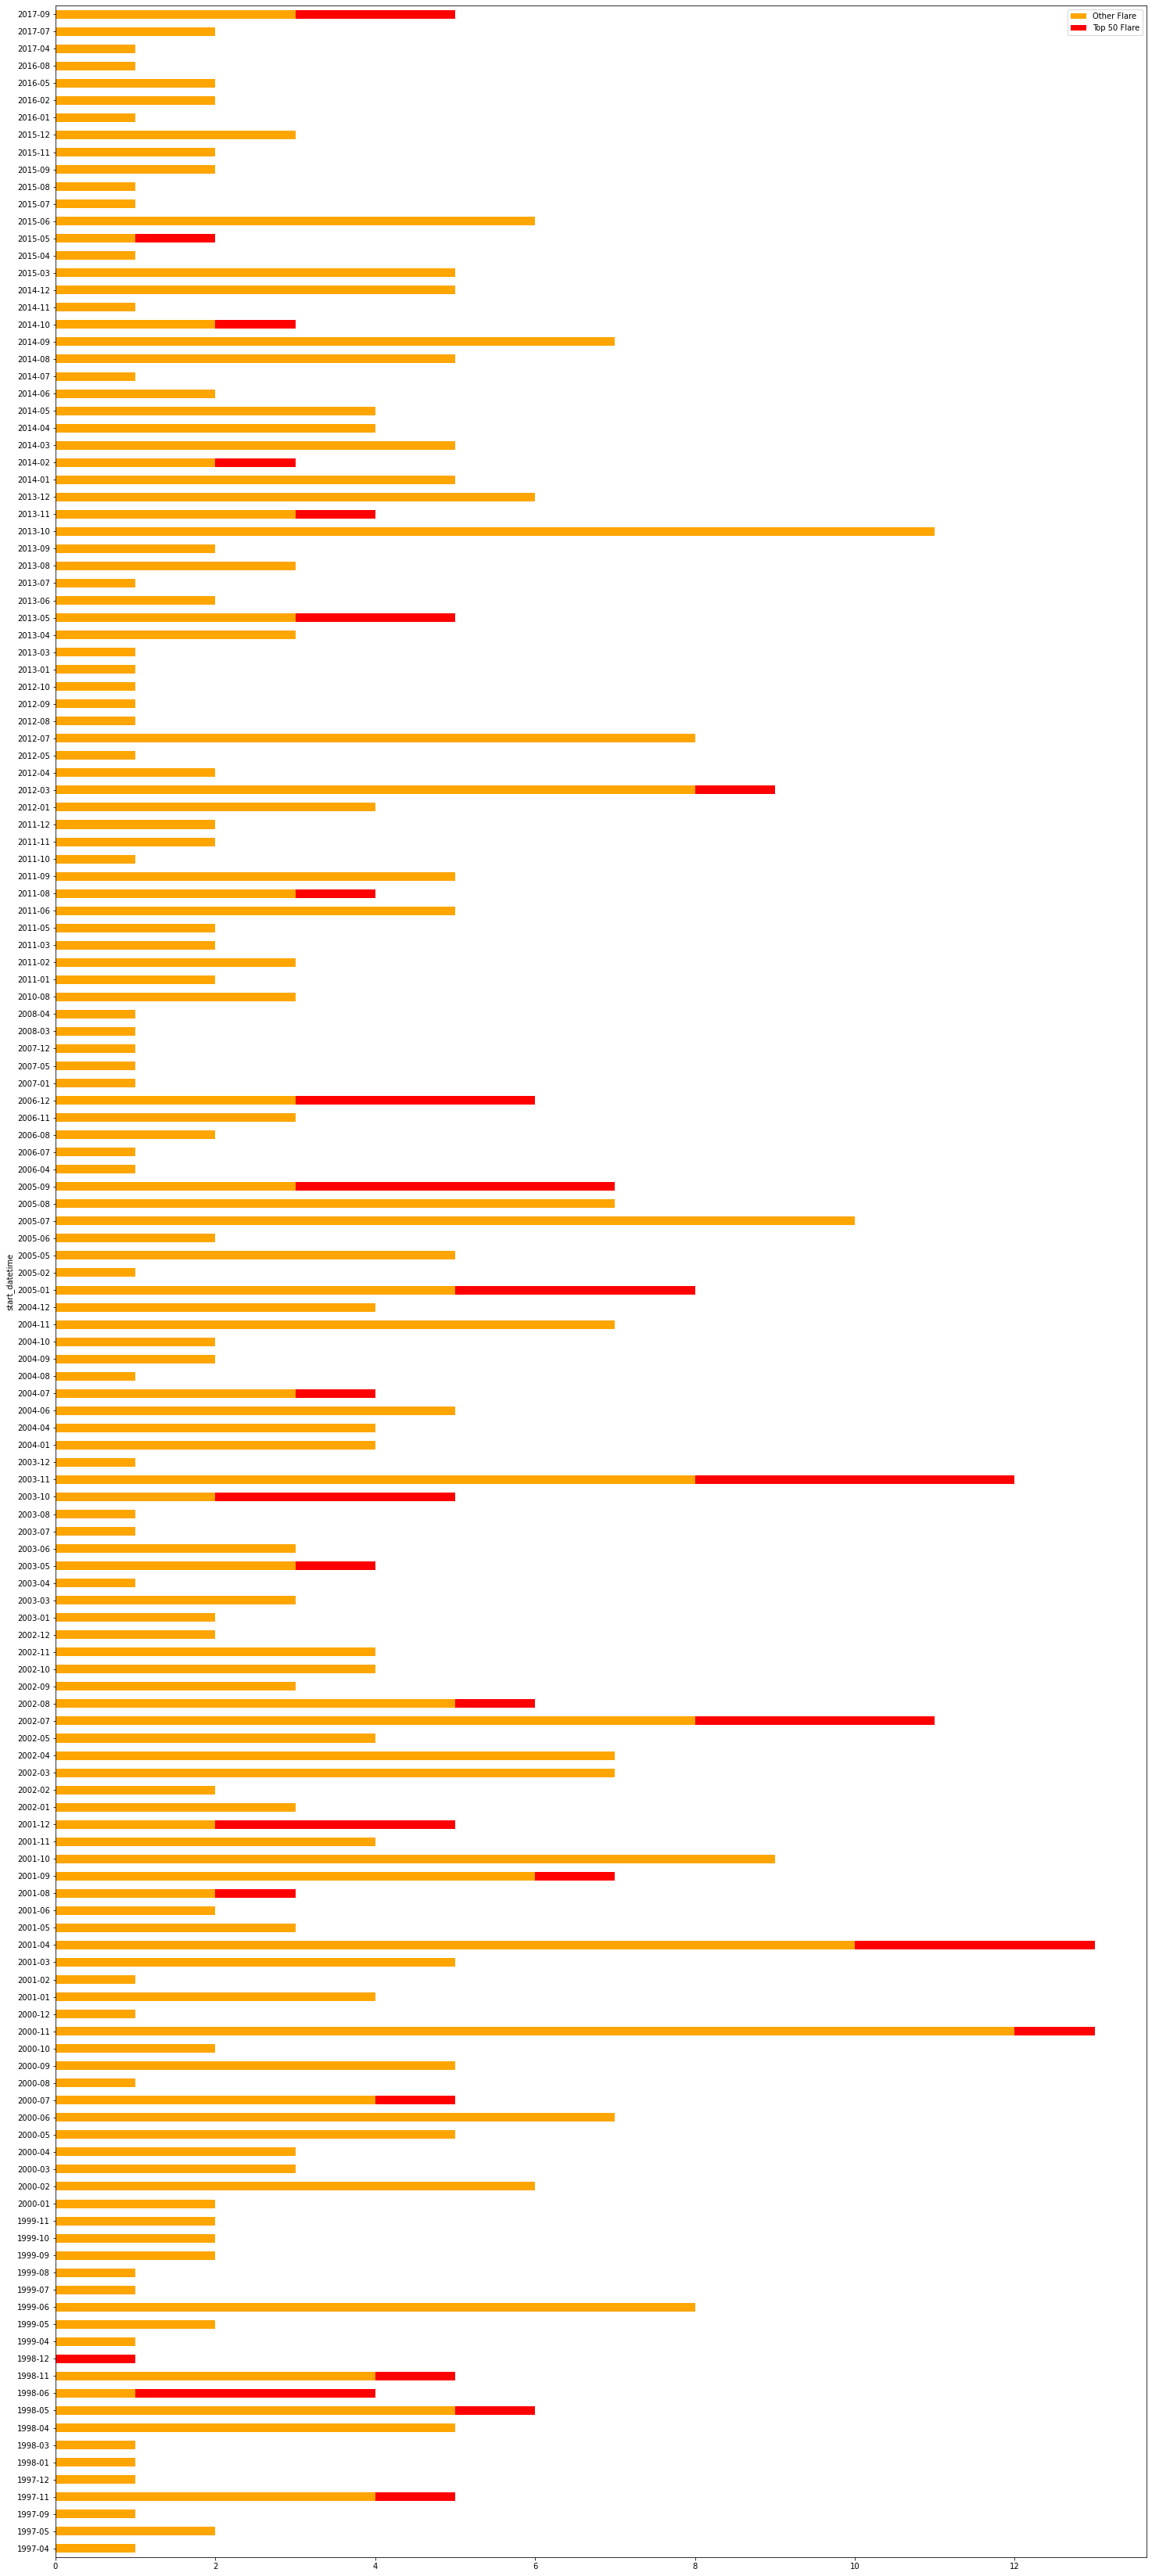

In [202]:
import matplotlib.pyplot as plt

plot_nasa_frame = updated_nasa_frame.copy()

dates = plot_nasa_frame['start_datetime'].apply(lambda x: x.strftime('%Y-%m'))
top_50 = plot_nasa_frame['swl_rank'].apply(lambda x: classify(x))
datesdf = dates.to_frame().join(top_50.to_frame())
bar = pd.crosstab(datesdf['start_datetime'], datesdf['swl_rank']).plot.barh(figsize=(25,60), stacked=True, color={'Other': 'orange', 'top_50': 'red'})
bar.legend(["Other Flare", "Top 50 Flare"])
bar

As we can see above, almost every top-50 flare occured in the same month as another flare, and only 5 top-50 flares occured in a month with fewer than 4 flares total. This would seem to suggest that strong flares do not occur alone. The single top-50 flare which did occur in a month all on its own, the one in December of 1998, is one of the flares that did not have a clear match in the SWL data, and is reported on the NASA site as only having been of class M, so it is a likely error in our dataset.